In [1]:
import QUEVO
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
mutation_prob = 0.15
number_of_runs=50
gates = 10 # 5,10,15,20
chromosomes = 20
generations = 500
gate_types = ['cx', 'x', 'h', 'rxx', 'rzz', 'swap', 'z', 'y', 'toffoli']
target_entanglement = [0.9999999999999996]


In [3]:
#Additional code
import numpy as np
import matplotlib.pyplot as plt

def run_evolution(number_of_runs, mutation_prob):
    
    all_fitness_data = []
    best_fitness_per_gen = []

    for i in range(0, number_of_runs):
        
        init_gen = QUEVO.Generation(chromosomes, gates)
        init_gen.create_initial_generation(gate_types)

        init_gen.run_generation(target_entanglement)

        current_chromosome = init_gen.get_best_chromosome()
        best_chromosome = current_chromosome
        final_fitness = init_gen.get_best_fitness()

        final_fitness_list = [final_fitness]
        best_fitness_list = [final_fitness]

        for gen in range(0, generations):
            init_gen.evolve_into_next_generation(mutation_prob) 
            init_gen.run_generation(target_entanglement) 

            current_fitness = init_gen.get_best_fitness()
            current_chromosome = init_gen.get_best_chromosome()
            print((str(gen + 1)+"\n")+str(current_fitness),end='')

            if final_fitness > abs(current_fitness):
                final_fitness = current_fitness
                best_chromosome = current_chromosome

            final_fitness_list.append(current_fitness)
            best_fitness_list.append(max(best_fitness_list[-1], current_fitness))  # store the best fitness in each generation
            if current_fitness < 0.01:
                break
                
        all_fitness_data.append(final_fitness_list)
        best_fitness_per_gen.append(best_fitness_list)  # store the list of best fitnesses across all runs
        print("Run ", i+1, " completed ")
        
    # calculate mean and standard deviation, and standard error
    mean_fitness = np.mean(all_fitness_data, axis=0)
    std_fitness = np.std(all_fitness_data, axis=0)
    standard_error = std_fitness / np.sqrt(number_of_runs)
    
    # calculate the mean and standard deviation of the best fitness in each generation
    best_fitness_per_gen = np.array(best_fitness_per_gen)
    mean_best_fitness = np.mean(best_fitness_per_gen, axis=0)
    std_best_fitness = np.std(best_fitness_per_gen, axis=0)
    standard_error_best_fitness = std_best_fitness / np.sqrt(number_of_runs)

    # print the mean fitness, standard deviation, and standard error
    print('Mean fitness: ', mean_fitness)
    print('Standard deviation of fitness: ', std_fitness)
    print('Standard error of the mean fitness: ', standard_error)
    print('Mean best fitness: ', mean_best_fitness)
    print('Standard deviation of best fitness: ', std_best_fitness)
    print('Standard error of the mean best fitness: ', standard_error_best_fitness)
    
    return mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness

# call the function and save the data to a file
file_name = 'Mutation_0.10_10gates.txt'
mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness = run_evolution(number_of_runs=50, mutation_prob=0.10)
np.savetxt(file_name, np.column_stack((mean_fitness, std_fitness, standard_error, mean_best_fitness, std_best_fitness, standard_error_best_fitness)), header="Mean fitness, Standard deviation of fitness, Standard error of the mean fitness, Mean best fitness, Standard deviation of best fitness, Standard error of the mean best fitness", fmt='%1.4f', delimiter=',')

1
0.30690760360942572
0.178778956535665453
0.25156436863427214
0.210616062349271665
0.191369815696841976
0.25115452352470267
0.17983336321880468
0.22741052184316099
0.1990864871061316410
0.507877403173028111
0.2769161011152868612
0.1897914248147487513
0.3330812397203326614
0.313640286721415415
0.313640286721415416
0.333333333333332817
0.288573888382283718
0.3330812397203326619
0.333333333333332820
0.2066448612559227421
0.296106829369103422
0.2012036874684430823
0.1952988625762428524
0.275164367067172325
0.333333333333332826
0.333333333333332827
0.2023224812358953628
0.296106829369103429
0.3030731148394929530
0.2334110504259003831
0.2071968735887916932
0.296106829369103433
0.333333333333332834
0.166666666666666335
0.2016196401347639736
0.207024612287095937
0.2715342090101977638
0.333333333333332839
0.250219888682760840
0.333333333333332841
0.1972847260747070442
0.280193624155678643
0.2040087130458896344
0.294258056378187645
0.333333333333332846
0.1960987365391029247
0.195309498067552054

0.3304156925903211376
0.1952621535851391377
0.3333333333333328378
0.3333333333333328379
0.3332907053186762380
0.3333333333333328381
0.3333333333333328382
0.3080028735186614383
0.3333333333333328384
0.3333333333333327385
0.3333333333333328386
0.3333333333333328387
0.3333333333333328388
0.23732674756785389
0.2762789147088006390
0.3333333333333328391
0.2762789147088006392
0.3333333333333328393
0.3333333333333328394
0.2556213275497057395
0.1956374945852536396
0.266040347511881397
0.33329070531867644398
0.2762460081519448399
0.3333333333333328400
0.3333333333333328401
0.2823828458474469402
0.3333333333333328403
0.3333333333333328404
0.3333333333333328405
0.33329070531867644406
0.3080028735186614407
0.2707529733739118408
0.3080028735186614409
0.30963521396023697410
0.29327546623061795411
0.3039872055559121412
0.3080028735186614413
0.3080028735186614414
0.3080028735186614415
0.3080028735186614416
0.2767960282328509417
0.3080028735186614418
0.1954821503790507419
0.23705840327254235420
0.188427

0.19577426331879855245
0.15186849828459714246
0.3051576857411096247
0.3051576857411096248
0.15186849828459714249
0.19577426331879855250
0.3333333333333328251
0.19577426331879855252
0.19577426331879855253
0.15186849828459714254
0.19577426331879855255
0.15186849828459714256
0.22181910783348424257
0.15186849828459714258
0.19577426331879855259
0.19577426331879855260
0.19577426331879855261
0.19577426331879855262
0.19577426331879855263
0.23498318422515885264
0.19577426331879855265
0.19577426331879855266
0.19577426331879855267
0.2269261145217083268
0.19577426331879855269
0.2258098816429388270
0.19577426331879866271
0.2538190545877047272
0.19577426331879866273
0.22110690967630497274
0.3333333333333328275
0.2134467904775894276
0.25814918331439374277
0.27534756797056903278
0.29745573592617525279
0.19577426331879855280
0.1889931598616732281
0.28145228278439405282
0.3333333333333328283
0.19577426331879855284
0.19577426331879866285
0.2418247593223376286
0.3313659195023426287
0.28205943707280046288


0.16666666666666619111
0.16666666666666619112
0.16666666666666619113
0.16666666666666619114
0.49999999999999956115
0.16666666666666619116
0.16666666666666619117
0.16666666666666619118
0.16666666666666619119
0.16666666666666619120
0.16666666666666619121
0.16666666666666619122
0.16666666666666619123
0.16666666666666619124
0.16666666666666619125
0.16666666666666619126
0.16666666666666619127
0.16666666666666619128
0.16666666666666619129
0.16666666666666619130
0.16666666666666619131
0.16666666666666619132
0.33333333333333304133
0.16666666666666619134
0.16666666666666619135
0.3333333333333328136
0.16666666666666619137
0.3333333333333328138
0.16666666666666619139
0.16666666666666619140
0.16666666666666619141
0.16666666666666619142
0.16666666666666619143
0.16666666666666619144
0.16666666666666619145
0.16666666666666619146
0.16666666666666619147
0.16666666666666619148
0.16666666666666619149
0.16666666666666619150
0.16666666666666619151
0.16666666666666619152
0.3333333333333328153
0.166666666666

0.16666666666666619468
0.16666666666666619469
0.33807593726783125470
0.16666666666666619471
0.16666666666666619472
0.16666666666666619473
0.16666666666666619474
0.16666666666666619475
0.16666666666666619476
0.16666666666666619477
0.16666666666666619478
0.16666666666666619479
0.16666666666666619480
0.16666666666666619481
0.16666666666666619482
0.16666666666666619483
0.16666666666666619484
0.16666666666666619485
0.33807593726783125486
0.16666666666666619487
0.16666666666666619488
0.16666666666666619489
0.16666666666666619490
0.16666666666666619491
0.16666666666666619492
0.16666666666666619493
0.28650007934034616494
0.16666666666666619495
0.16666666666666619496
0.3333333333333328497
0.16666666666666619498
0.16666666666666619499
0.16666666666666619500
0.16666666666666619Run  3  completed 
1
0.32482036095369472
0.166666666666666193
0.260980579537278164
0.33226618107372715
0.29311770059834136
0.33333333333333287
0.16666666666666638
0.31245265548991939
0.2414933871271085510
0.2823311128558896

0.25854043088418334
0.25648335923040555335
0.25854043088418336
0.25854043088418337
0.25854043088418338
0.25854043088418339
0.28524993936935705340
0.2614029319232868341
0.20222320899834167342
0.2654484240320103343
0.2714436516081278344
0.1849150376703944345
0.28524993936935705346
0.27516390463839735347
0.2783832506992633348
0.2587471821321239349
0.2740433803862361350
0.25648335923040555351
0.2585404308841799352
0.20414302680726548353
0.25336775444838666354
0.3333333333333328355
0.17971054714174994356
0.2961320288081726357
0.1858596245896329358
0.32995452124169333359
0.1594411395943781360
0.13828001005545631361
0.3174708179532242362
0.25336775444838666363
0.24979163429315587364
0.5723869684041213365
0.25336775444838666366
0.31672591073950973367
0.2607419654183053368
0.19501921665532806369
0.25336775444838666370
0.21973841358898405371
0.23095706709465125372
0.20350522767917123373
0.25336775444838666374
0.25648335923040555375
0.25336775444838666376
0.25106189114016586377
0.2533677544483866

0.2620023949188215205
0.6717576747856621206
0.49324974284341605207
0.6717576747856621208
0.2953936237269523209
0.2005683354714035210
0.28490596093568177211
0.27112051796473235212
0.28490596093568166213
0.31912851938238684214
0.27188512080025895215
0.30702474891900966216
0.2620023949188215217
0.28490596093568166218
0.21671428157243122219
0.2620023949188215220
0.2701246579288933221
0.3333333333333329222
0.3333333333333328223
0.32026816922599466224
0.28490596093568166225
0.6717576747856621226
0.2620023949188215227
0.2952749779913413228
0.22902457398547504229
0.567266417811866230
0.3312392725342781231
0.28490596093568166232
0.28490596093568177233
0.6717576747856621234
0.28490596093568177235
0.28490596093568166236
0.8547178828070461237
0.27855840314949576238
0.28490596093568166239
0.28490596093568166240
0.28490596093568177241
0.21387603175752656242
0.28490596093568177243
0.19902356373143015244
0.6703088438309256245
0.5243515621961983246
0.4228829289593028247
0.3760204361297743248
0.53007198

0.333333333333332877
0.333333333333332878
0.309835493717050379
0.1666666666666661980
0.333333333333332881
0.333333333333332882
0.333333333333332883
0.333333333333332884
0.333333333333332885
0.333333333333332886
0.333333333333332887
0.333333333333332888
0.333333333333332889
0.333333333333332890
0.333333333333332891
0.333333333333332892
0.333333333333332893
0.333333333333332894
0.333333333333332895
0.333333333333332896
0.333333333333332897
0.333333333333332898
0.333333333333332899
0.3333333333333328100
0.3333333333333328101
0.3333333333333328102
0.3333333333333328103
0.3333333333333328104
0.3333333333333328105
0.3333333333333328106
0.3098354937170502107
0.3333333333333328108
0.3333333333333328109
0.3333333333333328110
0.3333333333333328111
0.3333333333333328112
0.27718518067697206113
0.3333333333333328114
0.3333333333333328115
0.3333333333333328116
0.3333333333333328117
0.3333333333333328118
0.3333333333333328119
0.3333333333333328120
0.3333333333333328121
0.16666666666666619122
0.333333

0.3333333333333328451
0.3333333333333328452
0.3333333333333328453
0.3333333333333328454
0.3333333333333328455
0.3333333333333328456
0.3333333333333328457
0.3333333333333328458
0.3333333333333328459
0.3333333333333328460
0.3333333333333328461
0.3333333333333328462
0.3333333333333328463
0.3333333333333328464
0.3333333333333328465
0.3333333333333328466
0.3333333333333328467
0.3333333333333328468
0.3333333333333328469
0.3333333333333328470
0.3333333333333328471
0.3333333333333328472
0.3333333333333328473
0.3333333333333328474
0.3333333333333328475
0.3333333333333328476
0.3333333333333328477
0.3333333333333328478
0.1666666666666663479
0.3333333333333328480
0.3333333333333328481
0.3333333333333328482
0.3333333333333328483
0.3333333333333328484
0.3333333333333328485
0.3333333333333328486
0.3333333333333328487
0.3333333333333328488
0.3333333333333328489
0.3333333333333328490
0.3333333333333328491
0.3333333333333328492
0.3333333333333328493
0.3333333333333328494
0.3333333333333328495
0.16666666

0.3333333333333328324
0.4999999999999998325
0.4999999999999998326
0.3333333333333328327
0.9999999999999996328
1.0329
0.9999999999999998330
0.9999999999999996331
0.33333333333333304332
0.9999999999999996333
0.3333333333333328334
0.3333333333333328335
1.0336
0.9999999999999993337
0.9999999999999996338
0.9999999999999996339
0.9999999999999993340
0.9999999999999996341
0.3333333333333328342
0.33333333333333304343
0.9999999999999996344
0.33333333333333304345
0.49999999999999967346
0.33333333333333304347
0.4999999999999998348
0.47647823951840096349
0.9999999999999998350
0.33333333333333304351
1.0352
0.9999999999999996353
0.9999999999999996354
0.9999999999999996355
1.0356
0.9999999999999993357
0.3333333333333329358
0.9999999999999996359
0.9999999999999993360
0.9999999999999993361
0.33333333333333304362
0.9999999999999993363
0.9999999999999993364
0.3333333333333328365
0.3333333333333328366
0.33333333333333304367
0.4999999999999998368
0.9999999999999998369
0.9999999999999996370
0.333333333333333

0.16666666666666619201
0.16666666666666619202
0.16666666666666619203
0.16666666666666619204
0.16666666666666619205
0.16666666666666619206
0.16666666666666619207
0.16666666666666619208
0.16666666666666619209
0.16666666666666619210
0.16666666666666619211
0.16666666666666619212
0.16666666666666619213
0.16666666666666619214
0.16666666666666619215
0.16666666666666619216
0.3333333333333328217
0.16666666666666619218
0.3333333333333328219
0.16666666666666619220
0.16666666666666619221
0.16666666666666619222
0.16666666666666619223
0.16666666666666619224
0.16666666666666619225
0.16666666666666619226
0.16666666666666619227
0.3333333333333328228
0.16666666666666619229
0.16666666666666619230
0.16666666666666619231
0.16666666666666619232
0.16666666666666619233
0.16666666666666619234
0.16666666666666619235
0.16666666666666619236
0.16666666666666619237
0.16666666666666619238
0.16666666666666619239
0.16666666666666619240
0.16666666666666619241
0.16666666666666619242
0.16666666666666619243
0.166666666666

0.333333333333332969
0.3333333333333330470
0.3333333333333330471
0.999999999999999672
0.999999999999999673
0.999999999999999874
0.999999999999999375
1.076
0.999999999999999677
0.3333333333333330478
0.333333333333332879
1.080
0.999999999999999681
0.333333333333332882
0.3333333333333330483
1.084
1.085
0.333333333333332886
0.999999999999999687
1.088
1.089
0.999999999999999690
0.999999999999999691
0.999999999999999692
0.999999999999999693
0.999999999999999394
0.333333333333332895
0.4922589286025129796
0.999999999999999697
0.333333333333332998
1.099
1.0100
0.33333333333333304101
0.9999999999999996102
1.0103
1.0104
0.9999999999999993105
0.3333333333333328106
0.3333333333333328107
0.9999999999999993108
0.33333333333333304109
0.33333333333333304110
0.33333333333333304111
0.49999999999999967112
0.33333333333333304113
0.9999999999999996114
0.33333333333333304115
1.0116
0.49999999999999967117
0.9999999999999996118
0.33333333333333304119
0.3333333333333328120
0.9999999999999996121
0.99999999999999

0.9678568488423327468
0.9678568488423327469
0.3333333333333328470
0.3333333333333328471
0.3333333333333328472
0.9678568488423327473
0.9678568488423327474
0.9678568488423327475
0.9678568488423327476
0.9678568488423327477
0.3333333333333328478
0.9666606031872598479
0.9678568488423327480
0.3325699561211177481
0.9678568488423327482
0.9678568488423327483
0.9678568488423327484
0.9678568488423327485
0.9678568488423327486
0.49923662278778447487
0.9678568488423327488
0.9678568488423327489
0.3333333333333328490
0.9678568488423327491
0.9678568488423327492
0.9678568488423327493
0.3333333333333328494
0.3333333333333328495
0.9678568488423327496
0.9678568488423327497
0.3333333333333328498
0.3654764844909997499
0.3333333333333328500
0.49999999999999967Run  9  completed 
1
0.323260667107230342
0.254684171145016073
0.28271595279735864
0.25433389185504735
0.28271595279735866
0.25433389185504737
0.25433389185504738
0.25433389185504739
0.2576188965648661410
0.271393387395122111
0.264885876349110212
0.25290

0.20233830594297597333
0.2194413650626692334
0.2194413650626692335
0.2194413650626692336
0.17090556782164912337
0.2194413650626692338
0.2194413650626692339
0.2194413650626692340
0.2194413650626692341
0.2194413650626692342
0.2194413650626692343
0.2194413650626692344
0.2194413650626692345
0.2194413650626692346
0.2194413650626692347
0.2194413650626692348
0.2194413650626692349
0.2194413650626692350
0.2194413650626692351
0.19808926115551473352
0.2194413650626692353
0.2194413650626692354
0.2194413650626692355
0.2194413650626692356
0.25251362702339863357
0.2194413650626692358
0.23120810601021502359
0.2194413650626692360
0.16666666666666619361
0.23120810601021502362
0.23120810601021502363
0.17870540416146075364
0.23120810601021502365
0.23120810601021502366
0.19526983431006728367
0.22050707011630044368
0.22050707011630044369
0.22050707011630044370
0.1657104357353194371
0.23120810601021502372
0.16362623732864567373
0.23120810601021502374
0.23120810601021502375
0.22858540422637286376
0.2312081060

0.1666666666666663200
0.3333333333333328201
0.1666666666666663202
0.3333333333333328203
0.3333333333333328204
0.3333333333333328205
0.3333333333333329206
0.3333333333333329207
0.3333333333333328208
0.1666666666666663209
0.3333333333333328210
0.1666666666666663211
0.1666666666666663212
0.1666666666666663213
0.1666666666666663214
0.1666666666666663215
0.1666666666666663216
0.16666666666666619217
0.3333333333333329218
0.1666666666666663219
0.3333333333333328220
0.1666666666666663221
0.1666666666666663222
0.3333333333333328223
0.1666666666666663224
0.3333333333333328225
0.1666666666666663226
0.16666666666666619227
0.1666666666666663228
0.1666666666666663229
0.1666666666666663230
0.1666666666666663231
0.1666666666666663232
0.1666666666666663233
0.1666666666666663234
0.16666666666666619235
0.1666666666666663236
0.1666666666666663237
0.1666666666666663238
0.1666666666666663239
0.3333333333333329240
0.1666666666666663241
0.1666666666666663242
0.1666666666666663243
0.1666666666666663244
0.16666

0.2616452598747024473
0.3320297456210139574
0.3018289337347951475
0.3281435710977380676
0.280252680751127477
0.3320297456210139578
0.3320297456210139579
0.3320297456210138480
0.3320297456210139581
0.3320297456210138482
0.333333333333332883
0.1887257260589784284
0.3320297456210139585
0.3320297456210140686
0.3320297456210139587
0.3320297456210139588
0.321755280307306589
0.333333333333332890
0.3320297456210139591
0.3320297456210139592
0.3320297456210139593
0.294429565397984594
0.3320297456210139595
0.3332917931715314696
0.333333333333332897
0.3320297456210139598
0.3320297456210139599
0.33202974562101395100
0.3333333333333328101
0.33202974562101395102
0.33331996600984193103
0.33202974562101395104
0.3333333333333328105
0.33202974562101384106
0.3333333333333328107
0.3333333333333328108
0.3333333333333328109
0.2858741744004838110
0.33202974562101395111
0.33202974562101395112
0.33202974562101406113
0.2943314687303994114
0.3333333333333328115
0.33328594521954116
0.24892932487410024117
0.3325070

0.22270909907588787438
0.16996378782208654439
0.272020455222457440
0.19527784233845913441
0.27987917480791136442
0.2053912650571994443
0.19169680605844563444
0.3333333333333328445
0.28546034235994866446
0.24074612508445836447
0.19943727841196512448
0.22468453622759044449
0.28546034235994866450
0.25377461701717596451
0.28546034235994866452
0.27887581105952886453
0.19527784233845913454
0.16666666666666619455
0.2576205733994045456
0.18128795867823422457
0.2191035771935732458
0.2510194741979741459
0.28546034235994866460
0.24204117973493866461
0.30821898528369573462
0.28546034235994866463
0.28546034235994866464
0.3333333333333328465
0.20341707485024063466
0.23090932546736476467
0.3017371458999937468
0.28546034235994866469
0.26667022970342313470
0.18404256621587156471
0.25132176930792216472
0.2991236389257743473
0.22916007858061016474
0.3333333333333328475
0.21438619291725947476
0.23730314789089935477
0.2788822621790712478
0.2991236389257743479
0.27839973917494887480
0.28546034235994866481
0

0.3333333333333328310
0.33333333333333304311
0.3333333333333328312
0.3333333333333328313
0.9999999999999993314
0.3333333333333328315
0.3333333333333328316
0.3333333333333328317
0.3333333333333328318
0.3333333333333328319
0.1666666666666663320
0.3333333333333328321
0.3333333333333328322
0.33333333333333304323
0.3333333333333328324
0.3333333333333329325
0.3333333333333328326
0.3333333333333328327
0.3333333333333328328
0.9999999999999993329
0.3333333333333328330
0.9999999999999993331
0.3333333333333328332
0.3333333333333328333
0.33333333333333304334
0.33333333333333304335
0.3333333333333328336
0.33333333333333304337
0.1666666666666663338
0.3333333333333328339
0.3333333333333328340
0.33333333333333304341
0.3333333333333328342
0.3333333333333328343
0.3333333333333328344
0.3333333333333328345
0.9999999999999993346
0.3333333333333328347
0.3333333333333329348
0.3333333333333328349
0.3333333333333328350
0.9999999999999993351
0.3333333333333328352
0.9999999999999996353
0.3333333333333329354
0.33

0.19717771416832708184
0.3333333333333328185
0.3333333333333328186
0.19653065160008854187
0.1952863596376282188
0.1952863596376282189
0.19526615424842209190
0.1952863596376282191
0.1952863596376282192
0.2976858307079153193
0.1952863596376282194
0.1952863596376282195
0.3333333333333328196
0.1952863596376282197
0.20220256299956296198
0.1952863596376282199
0.3333333333333328200
0.1952863596376282201
0.1952863596376282202
0.1952863596376282203
0.24158683198041486204
0.2221507324799673205
0.1952863596376282206
0.1952863596376282207
0.1952863596376282208
0.3333333333333328209
0.3333333333333328210
0.1952863596376282211
0.1952863596376282212
0.3333333333333328213
0.1666666666666663214
0.19571255018557798215
0.3333333333333328216
0.1952863596376282217
0.21297801156591212218
0.3333333333333328219
0.3333333333333328220
0.3333333333333328221
0.1952863596376282222
0.1952863596376282223
0.1952863596376282224
0.1952863596376282225
0.1952863596376282226
0.21487470843099743227
0.1952863596376282228
0.

0.333333333333332856
0.333333333333332857
0.333333333333332858
0.333333333333332859
0.333333333333332860
0.333333333333332861
0.333333333333332862
0.333333333333332863
0.333333333333332864
0.333333333333332865
0.329037282428243766
0.333333333333332867
0.333333333333332868
0.333333333333332869
0.333333333333332870
0.333333333333332871
0.333333333333332872
0.333333333333332873
0.333333333333332874
0.333333333333332875
0.333333333333332976
0.333333333333332877
0.333333333333332878
0.333333333333332879
0.333333333333332880
0.333333333333332881
0.333333333333332882
0.333333333333332883
0.333333333333332884
0.333333333333332885
0.333333333333332886
0.333333333333332887
0.333333333333332888
0.333333333333332889
0.333333333333332890
0.333333333333332891
0.333333333333332892
0.333333333333332893
0.333333333333332894
0.333333333333332895
0.333333333333332896
0.333333333333332897
0.333333333333332898
0.333333333333332899
0.3333333333333328100
0.3333333333333329101
0.33333333333333304102
0.3333333

0.3333333333333328430
0.3333333333333328431
0.3333333333333328432
0.3333333333333328433
0.3333333333333328434
0.3333333333333328435
0.3333333333333328436
0.3333333333333328437
0.3333333333333328438
0.3333333333333328439
0.3333333333333328440
0.3333333333333328441
0.3333333333333328442
0.3333333333333328443
0.3333333333333328444
0.3333333333333328445
0.3333333333333328446
0.3333333333333328447
0.3333333333333328448
0.3333333333333328449
0.3333333333333328450
0.33333333333333304451
0.3333333333333328452
0.3333333333333328453
0.3333333333333328454
0.3333333333333328455
0.33333333333333304456
0.3333333333333328457
0.3333333333333328458
0.3333333333333328459
0.3333333333333328460
0.3333333333333328461
0.3333333333333328462
0.3333333333333328463
0.3333333333333328464
0.3333333333333328465
0.3333333333333328466
0.3333333333333328467
0.3333333333333328468
0.3333333333333328469
0.3333333333333328470
0.3333333333333328471
0.3333333333333328472
0.3333333333333328473
0.3333333333333328474
0.333333

0.3333333333333328308
0.9621662083588878309
0.9999999999999993310
0.9999999999999993311
0.33333333333333304312
0.3333333333333329313
0.9999999999999993314
0.9999999999999992315
0.33333333333333304316
0.3333333333333328317
0.33333333333333304318
0.9999999999999993319
0.3333333333333329320
0.9999999999999993321
0.9999999999999993322
0.9999999999999996323
0.9999999999999993324
0.9999999999999996325
0.9999999999999996326
0.9999999999999992327
0.9999999999999993328
0.3333333333333328329
0.9999999999999993330
0.3333333333333328331
0.3333333333333328332
0.4999999999999998333
0.3333333333333328334
0.9999999999999993335
0.9999999999999996336
0.9999999999999993337
0.9999999999999992338
0.9999999999999996339
0.9999999999999996340
0.9999999999999993341
0.3333333333333329342
0.3333333333333329343
0.3333333333333329344
0.3333333333333328345
0.33333333333333304346
0.3333333333333329347
1.0348
0.33333333333333304349
0.33333333333333304350
0.4989162425265855351
0.9999999999999993352
0.33333333333333283

0.3333333333333328184
0.3333333333333328185
0.3333333333333328186
0.3333333333333328187
0.3333333333333328188
0.3333333333333328189
0.3333333333333328190
0.3333333333333328191
0.3333333333333328192
0.3333333333333328193
0.3333333333333328194
0.3333333333333328195
0.3333333333333328196
0.3333333333333328197
0.3333333333333328198
0.3333333333333328199
0.1666666666666663200
0.3333333333333328201
0.3333333333333328202
0.3333333333333328203
0.3333333333333328204
0.3333333333333328205
0.3333333333333328206
0.3333333333333328207
0.3333333333333328208
0.3333333333333328209
0.3333333333333328210
0.3333333333333328211
0.3333333333333328212
0.3333333333333328213
0.3333333333333328214
0.3333333333333328215
0.3333333333333328216
0.3333333333333328217
0.3333333333333328218
0.3333333333333328219
0.3333333333333328220
0.3333333333333328221
0.3333333333333328222
0.3333333333333328223
0.3333333333333328224
0.3333333333333328225
0.3333333333333328226
0.3333333333333328227
0.3333333333333328228
0.33333333

0.333333333333332859
0.333333333333332860
0.32536137242978161
0.333333333333332862
0.333333333333332863
0.333333333333332864
0.3333333333333330465
0.3333333333333330466
0.32536137242978167
0.32536137242978168
0.32536137242978169
0.32536137242978170
0.333333333333332871
0.333333333333332872
0.333333333333332873
0.333333333333332874
0.333333333333332875
0.333333333333332876
0.32536137242978177
0.333333333333332878
0.333333333333332879
0.333333333333332880
0.333333333333332881
0.333333333333332882
0.32536137242978183
0.333333333333332884
0.32536137242978185
0.333333333333332886
0.32536137242978187
0.32536137242978188
0.32536137242978189
0.333333333333332890
0.32536137242978191
0.333333333333332892
0.333333333333332893
0.32536137242978194
0.333333333333332895
0.333333333333332896
0.333333333333332897
0.32536137242978198
0.32536137242978199
0.3333333333333328100
0.325361372429781101
0.3333333333333328102
0.3333333333333328103
0.325361372429781104
0.3333333333333328105
0.3333333333333328106


0.3333333333333328437
0.325361372429781438
0.3333333333333328439
0.3333333333333328440
0.3333333333333328441
0.325361372429781442
0.3333333333333328443
0.325361372429781444
0.3333333333333328445
0.3333333333333328446
0.325361372429781447
0.3333333333333328448
0.3333333333333328449
0.3333333333333328450
0.325361372429781451
0.3333333333333328452
0.325361372429781453
0.3333333333333328454
0.3333333333333328455
0.3333333333333328456
0.3333333333333328457
0.3333333333333328458
0.325361372429781459
0.3333333333333328460
0.3333333333333328461
0.33333333333333304462
0.3333333333333328463
0.3333333333333328464
0.3333333333333328465
0.3333333333333328466
0.3333333333333328467
0.33333333333333304468
0.3333333333333328469
0.3333333333333328470
0.3333333333333328471
0.3333333333333328472
0.3333333333333328473
0.3333333333333328474
0.3333333333333328475
0.32536137242978125476
0.32536137242978125477
0.32536137242978125478
0.3333333333333328479
0.3333333333333328480
0.3333333333333328481
0.3333333333

0.3333333333333329313
0.3333333333333328314
0.3333333333333328315
0.3333333333333329316
0.3333333333333329317
0.3333333333333328318
0.6990925612136383319
0.3333333333333328320
0.6990925612136383321
0.3333333333333329322
0.3333333333333328323
0.6990925612136383324
0.3333333333333329325
0.3333333333333328326
0.3333333333333329327
0.3333333333333329328
0.3333333333333329329
0.6990925612136383330
0.3333333333333328331
0.5925598362061746332
0.3333333333333328333
0.2281750346997603334
0.3333333333333328335
0.6990925612136383336
0.3333333333333328337
0.3333333333333329338
0.3333333333333329339
0.3333333333333328340
0.3333333333333328341
0.6511844436973329342
0.3333333333333329343
0.3333333333333328344
0.3333333333333328345
0.3333333333333329346
0.3333333333333328347
0.29052671658571516348
0.3333333333333328349
0.3333333333333328350
0.3333333333333328351
0.9999999999999992352
0.6990925612136383353
0.3333333333333329354
0.3333333333333329355
0.3333333333333328356
0.3333333333333328357
0.3333333

0.25357010058382257187
0.3333333333333328188
0.3333333333333328189
0.3333333333333328190
0.3333333333333327191
0.3333333333333328192
0.24110815091937754193
0.3333333333333328194
0.3333333333333328195
0.2037666030003915196
0.3333333333333328197
0.3333333333333328198
0.3333333333333328199
0.1974798551285034200
0.21522128829137266201
0.1666666666666663202
0.3333333333333328203
0.16666666666666619204
0.3333333333333328205
0.3333333333333328206
0.3333333333333328207
0.19551518212702268208
0.2183522902126933209
0.2053002170244811210
0.3333333333333328211
0.2020047133691899212
0.3333333333333328213
0.3333333333333328214
0.3333333333333328215
0.3333333333333328216
0.20057116580743262217
0.19583390469271544218
0.2096089013243717219
0.29616328386104906220
0.2216358170426993221
0.3333333333333328222
0.3333333333333328223
0.3333333333333328224
0.3333333333333328225
0.19838748716752608226
0.1954337489537583227
0.3333333333333328228
0.25660252359168356229
0.3333333333333328230
0.3333333333333328231


0.333333333333332858
0.333333333333332859
0.333333333333332860
0.333333333333332861
0.333333333333332862
0.333333333333332863
0.333333333333332864
0.333333333333332865
0.333333333333332866
0.333333333333332867
0.333333333333332868
0.333333333333332869
0.333333333333332870
0.333333333333332871
0.333333333333332872
0.333333333333332873
0.333333333333332874
0.333333333333332875
0.333333333333332876
0.333333333333332877
0.333333333333332878
0.333333333333332879
0.333333333333332880
0.333333333333332881
0.333333333333332882
0.333333333333332883
0.333333333333332884
0.333333333333332885
0.333333333333332886
0.333333333333332887
0.333333333333332888
0.333333333333332889
0.333333333333332890
0.333333333333332891
0.333333333333332892
0.333333333333332893
0.333333333333332894
0.333333333333332895
0.333333333333332896
0.333333333333332897
0.333333333333332898
0.333333333333332899
0.3333333333333328100
0.3333333333333328101
0.3333333333333328102
0.3333333333333328103
0.3333333333333328104
0.333333

0.3333333333333328432
0.3333333333333328433
0.3333333333333328434
0.3333333333333328435
0.3333333333333328436
0.3333333333333328437
0.3333333333333328438
0.3333333333333328439
0.3333333333333328440
0.3333333333333328441
0.3333333333333328442
0.9999999999999993443
0.3333333333333328444
0.3333333333333328445
0.3333333333333328446
0.3333333333333328447
0.3333333333333328448
0.3333333333333328449
0.3333333333333328450
0.3333333333333328451
0.3333333333333328452
0.3333333333333328453
0.3333333333333328454
0.3333333333333328455
0.3333333333333328456
0.3333333333333328457
0.3333333333333328458
0.3333333333333328459
0.3333333333333328460
0.3333333333333328461
0.1666666666666663462
0.3333333333333328463
0.3333333333333328464
0.3333333333333328465
0.3333333333333328466
0.3333333333333328467
0.3333333333333328468
0.3333333333333328469
0.3333333333333328470
0.3333333333333328471
0.3333333333333328472
0.3333333333333328473
0.3333333333333328474
0.3333333333333328475
0.3333333333333328476
0.33333333

0.1666666666666663305
0.33333333333333304306
0.33333333333333304307
0.3333333333333328308
0.33333333333333304309
0.3333333333333328310
0.1666666666666663311
0.33333333333333304312
0.33333333333333304313
0.3333333333333328314
0.33333333333333304315
0.1666666666666663316
0.3333333333333328317
0.3333333333333328318
0.3333333333333328319
0.3333333333333328320
0.3333333333333328321
0.3333333333333328322
0.3333333333333328323
0.33333333333333304324
0.3333333333333328325
0.3333333333333328326
0.33333333333333304327
0.33333333333333304328
0.3333333333333328329
0.3333333333333328330
0.3333333333333328331
0.3333333333333328332
0.3333333333333328333
0.33333333333333304334
0.3333333333333328335
0.3333333333333328336
0.3333333333333328337
0.33333333333333304338
0.3333333333333328339
0.3333333333333328340
0.3333333333333328341
0.3333333333333328342
0.3333333333333328343
0.33333333333333304344
0.33333333333333304345
0.3333333333333328346
0.1666666666666663347
0.3333333333333328348
0.99999999999999933

0.1666666666666663176
0.1666666666666663177
0.1666666666666663178
0.49999999999999967179
0.1666666666666663180
0.1666666666666663181
0.1666666666666663182
0.1666666666666663183
0.1666666666666663184
0.1666666666666663185
0.49999999999999967186
0.1666666666666663187
0.1666666666666663188
0.3333333333333329189
0.1666666666666663190
0.49999999999999967191
0.49999999999999967192
0.49999999999999967193
0.1666666666666663194
0.1666666666666663195
0.1666666666666663196
0.1666666666666663197
0.1666666666666663198
0.1666666666666663199
0.1666666666666663200
0.1666666666666663201
0.1666666666666663202
0.49999999999999967203
0.1666666666666663204
0.49999999999999967205
0.3333333333333328206
0.49999999999999967207
0.1666666666666663208
0.1666666666666663209
0.1666666666666663210
0.1666666666666663211
0.1666666666666663212
0.1666666666666663213
0.1666666666666663214
0.1666666666666663215
0.1666666666666663216
0.1666666666666663217
0.3333333333333328218
0.49999999999999967219
0.3333333333333329220
0

0.2136686179279916346
0.2136686179279916347
0.200077948948257748
0.200077948948257749
0.200077948948257750
0.200077948948257751
0.197070222438505752
0.197070222438505753
0.333333333333332954
0.333333333333332955
0.197070222438505756
0.197421155680796257
0.197070222438505758
0.197070222438505759
0.333333333333332860
0.333333333333332961
0.333333333333332862
0.1964229338548826363
0.197070222438505764
0.197070222438505765
0.197070222438505766
0.3296542649419864667
0.197070222438505768
0.333333333333332869
0.197070222438505770
0.1980579512464857371
0.333333333333332972
0.215881555842803173
0.197070222438505774
0.218208629716845475
0.197070222438505776
0.197070222438505777
0.197070222438505778
0.197070222438505779
0.197070222438505780
0.197070222438505781
0.197070222438505782
0.197070222438505783
0.1966226834052666784
0.197070222438505785
0.256947600663092286
0.197070222438505787
0.1964236871266302888
0.197070222438505789
0.197070222438505790
0.197070222438505791
0.197070222438505792
0.1970

0.19640623094967147410
0.33333333333333304411
0.19640623094967147412
0.19640623094967147413
0.19640623094967147414
0.19640623094967147415
0.25055457295995416
0.19640623094967147417
0.19640623094967147418
0.19640623094967147419
0.3333333333333328420
0.19640623094967147421
0.33333333333333304422
0.3333333333333328423
0.19640623094967147424
0.19640623094967147425
0.33333333333333304426
0.19640623094967147427
0.19640623094967147428
0.21304685386723876429
0.2324421408289098430
0.204466360498736431
0.3333333333333328432
0.2814465461412413433
0.3333333333333328434
0.33333333333333304435
0.19824688636501442436
0.20351597726742798437
0.19640623094967147438
0.19640623094967147439
0.19640623094967147440
0.19640623094967147441
0.33333333333333304442
0.33333333333333304443
0.19640623094967147444
0.1967328555957164445
0.19640623094967147446
0.19640623094967147447
0.19640623094967147448
0.19640623094967147449
0.19640623094967147450
0.33333333333333304451
0.19640623094967147452
0.3333333333333329453
0

0.3333333333333328284
0.3333333333333328285
0.3333333333333328286
0.3333333333333328287
0.3333333333333328288
0.3333333333333328289
0.3333333333333328290
0.3333333333333328291
0.3333333333333328292
0.3333333333333328293
0.3333333333333328294
0.3333333333333328295
0.3333333333333328296
0.3333333333333328297
0.3333333333333328298
0.3333333333333328299
0.3333333333333328300
0.3333333333333328301
0.3333333333333328302
0.3333333333333328303
0.3333333333333328304
0.3333333333333328305
0.3333333333333328306
0.3333333333333328307
0.1666666666666663308
0.3333333333333328309
0.3333333333333328310
0.3333333333333328311
0.3333333333333328312
0.3333333333333328313
0.3333333333333328314
0.3333333333333328315
0.3333333333333328316
0.3333333333333328317
0.1666666666666663318
0.3333333333333328319
0.3333333333333328320
0.3333333333333328321
0.3333333333333328322
0.3333333333333328323
0.3333333333333328324
0.3333333333333328325
0.3333333333333328326
0.3333333333333328327
0.3333333333333328328
0.33333333

0.16666666666666619153
0.16666666666666619154
0.16666666666666619155
0.16666666666666619156
0.16666666666666619157
0.16666666666666619158
0.16666666666666619159
0.16666666666666619160
0.16666666666666619161
0.16666666666666619162
0.16666666666666619163
0.16666666666666619164
0.16666666666666619165
0.16666666666666619166
0.16666666666666619167
0.16666666666666619168
0.16666666666666619169
0.16666666666666619170
0.16666666666666619171
0.16666666666666619172
0.16666666666666619173
0.16666666666666619174
0.16666666666666619175
0.16666666666666619176
0.16666666666666619177
0.16666666666666619178
0.16666666666666619179
0.1666666666666663180
0.16666666666666619181
0.16666666666666619182
0.16666666666666619183
0.16666666666666619184
0.16666666666666619185
0.16666666666666619186
0.16666666666666619187
0.16666666666666619188
0.16666666666666619189
0.16666666666666619190
0.16666666666666619191
0.16666666666666619192
0.16666666666666619193
0.16666666666666619194
0.16666666666666619195
0.1666666666

0.33333333333333289
0.166666666666666310
0.1850969639588704311
0.333333333333332812
0.166666666666666313
0.1850969639588704314
0.1850969639588704315
0.333333333333332816
0.1850969639588704317
0.333333333333332818
0.1850969639588704319
0.1850969639588704320
0.333333333333332821
0.333333333333332822
0.333333333333332823
0.1666666666666661924
0.333333333333332725
0.333333333333332826
0.333333333333332827
0.333333333333332828
0.1666666666666661929
0.333333333333332830
0.1666666666666661931
0.333333333333332832
0.333333333333332833
0.1666666666666661934
0.333333333333332835
0.333333333333332836
0.1666666666666661937
0.1666666666666661938
0.333333333333332839
0.1666666666666661940
0.333333333333332841
0.333333333333332842
0.333333333333332843
0.333333333333332844
0.333333333333332845
0.1666666666666661946
0.333333333333332847
0.1666666666666661948
0.333333333333332849
0.333333333333332850
0.1666666666666661951
0.1666666666666661952
0.1666666666666661953
0.333333333333332854
0.333333333333332

0.16666666666666619379
0.2691477938631055380
0.16666666666666619381
0.3333333333333328382
0.3333333333333328383
0.3333333333333327384
0.3333333333333328385
0.3333333333333328386
0.16666666666666619387
0.3333333333333328388
0.16666666666666619389
0.3333333333333327390
0.3333333333333328391
0.3333333333333328392
0.3333333333333328393
0.3333333333333328394
0.3333333333333328395
0.16666666666666619396
0.3333333333333328397
0.3333333333333328398
0.16666666666666619399
0.16666666666666619400
0.16666666666666619401
0.3333333333333327402
0.16666666666666619403
0.16666666666666619404
0.3333333333333328405
0.3333333333333328406
0.16666666666666619407
0.3333333333333328408
0.3333333333333328409
0.16666666666666619410
0.3333333333333328411
0.3333333333333328412
0.3333333333333328413
0.3333333333333328414
0.16666666666666619415
0.3333333333333328416
0.16666666666666619417
0.3333333333333328418
0.3333333333333328419
0.3333333333333328420
0.16666666666666619421
0.3333333333333328422
0.333333333333332

0.49999999999999967256
0.3333333333333328257
0.3333333333333328258
0.9999999999999996259
0.3333333333333328260
0.3333333333333328261
0.33333333333333304262
0.3333333333333328263
0.33333333333333304264
0.3333333333333328265
0.9999999999999993266
0.3333333333333328267
0.9999999999999996268
0.9999999999999998269
0.9999999999999996270
0.3333333333333328271
0.9999999999999998272
0.9999999999999996273
0.3333333333333328274
0.9999999999999993275
0.33333333333333304276
0.9999999999999996277
0.33333333333333304278
0.9999999999999992279
0.49999999999999967280
0.9999999999999993281
0.3333333333333328282
0.9999999999999996283
0.9999999999999996284
0.7622751772537544285
0.3333333333333328286
0.5931505268243482287
0.3333333333333328288
0.5740199850953541289
0.5931505268243482290
0.593150526824348291
0.7622751772537544292
0.3333333333333328293
0.3333333333333328294
0.3333333333333328295
0.3333333333333328296
0.3333333333333328297
0.3333333333333328298
0.24345029048600808299
0.3333333333333328300
0.33

0.2026416461288465130
0.2026416461288465131
0.26897354939389906132
0.26897354939389895133
0.3333333333333329134
0.2026416461288465135
0.2026416461288465136
0.2026416461288465137
0.2026416461288465138
0.22541400074486873139
0.3333333333333328140
0.26897354939389906141
0.2026416461288465142
0.26897354939389906143
0.19913398197227272144
0.19913398197227272145
0.19913398197227272146
0.19913398197227272147
0.19913398197227272148
0.19913398197227272149
0.19913398197227272150
0.19913398197227272151
0.2908433933757847152
0.25758989606605975153
0.2908433933757847154
0.19913398197227272155
0.2908433933757847156
0.3052280867624738157
0.19913398197227272158
0.19913398197227272159
0.19913398197227272160
0.19913398197227272161
0.2908433933757847162
0.2795134721809571163
0.19913398197227272164
0.19913398197227272165
0.2569943123196323166
0.19913398197227272167
0.19913398197227272168
0.3333333333333328169
0.19913398197227272170
0.2908433933757847171
0.28606279525042044172
0.19913398197227272173
0.3309

0.19808044740570507490
0.19808044740570496491
0.19808044740570507492
0.19808044740570496493
0.3333333333333329494
0.3333333333333329495
0.19808044740570496496
0.19808044740570507497
0.19808044740570507498
0.19808044740570496499
0.19808044740570496500
0.2673793163732484Run  29  completed 
1
0.33333333333333282
0.166666666666666193
0.33333333333333284
0.166666666666666195
0.166666666666666196
0.166666666666666197
0.166666666666666198
0.166666666666666199
0.1666666666666661910
0.333333333333332811
0.1666666666666661912
0.166666666666666313
0.1666666666666661914
0.1666666666666661915
0.1666666666666661916
0.166666666666666317
0.1666666666666661918
0.1666666666666661919
0.1666666666666661920
0.166666666666666321
0.166666666666666322
0.166666666666666323
0.166666666666666324
0.1666666666666661925
0.1666666666666661926
0.1666666666666661927
0.333333333333332828
0.1666666666666661929
0.1666666666666661930
0.1666666666666661931
0.1666666666666661932
0.166666666666666333
0.333333333333332834
0.1

0.16666666666666619356
0.16666666666666619357
0.16666666666666619358
0.16666666666666619359
0.16666666666666619360
0.16666666666666619361
0.16666666666666619362
0.16666666666666619363
0.16666666666666619364
0.16666666666666619365
0.16666666666666619366
0.16666666666666619367
0.1666666666666663368
0.1666666666666663369
0.16666666666666619370
0.16666666666666619371
0.1666666666666663372
0.16666666666666619373
0.16666666666666619374
0.16666666666666619375
0.1666666666666663376
0.1666666666666663377
0.1666666666666663378
0.3333333333333328379
0.3333333333333328380
0.16666666666666619381
0.9999999999999993382
0.16666666666666619383
0.16666666666666619384
0.49999999999999956385
0.3333333333333328386
0.16666666666666619387
0.1666666666666663388
0.16666666666666619389
0.16666666666666619390
0.16666666666666619391
0.16666666666666619392
0.16666666666666619393
0.1666666666666663394
0.16666666666666619395
0.49999999999999967396
0.16666666666666619397
0.3333333333333328398
0.16666666666666619399
0

0.3333333333333329225
0.33333333333333304226
0.3333333333333329227
0.3333333333333328228
0.3333333333333329229
0.3333333333333329230
0.33333333333333304231
0.33333333333333304232
0.33333333333333304233
0.3333333333333329234
0.3333333333333329235
0.3333333333333329236
0.33333333333333304237
0.3333333333333328238
0.3333333333333329239
0.33333333333333304240
0.3333333333333328241
0.33333333333333304242
0.3333333333333328243
0.1666666666666663244
0.3333333333333328245
0.3333333333333329246
0.3333333333333328247
0.3333333333333329248
0.33333333333333304249
0.3333333333333329250
0.3333333333333329251
0.3333333333333329252
0.3333333333333328253
0.3333333333333329254
0.3333333333333328255
0.33333333333333304256
0.3333333333333329257
0.33333333333333304258
0.3333333333333329259
0.33333333333333304260
0.33333333333333304261
0.3333333333333329262
0.33333333333333304263
0.3333333333333328264
0.33333333333333304265
0.33333333333333304266
0.3333333333333329267
0.3333333333333329268
0.333333333333332

0.333333333333332896
0.333333333333332897
0.333333333333332898
0.333333333333332899
0.3333333333333328100
0.3333333333333328101
0.1666666666666663102
0.3333333333333328103
0.3333333333333328104
0.3333333333333328105
0.3333333333333328106
0.3333333333333328107
0.3333333333333328108
0.3333333333333328109
0.3333333333333328110
0.3333333333333328111
0.3333333333333328112
0.3333333333333328113
0.3333333333333328114
0.3333333333333328115
0.3333333333333328116
0.3333333333333328117
0.3333333333333328118
0.3333333333333328119
0.3333333333333328120
0.3333333333333328121
0.3333333333333328122
0.3333333333333328123
0.3333333333333328124
0.3333333333333328125
0.3333333333333328126
0.3333333333333328127
0.3333333333333328128
0.3333333333333328129
0.3333333333333328130
0.3333333333333328131
0.3333333333333328132
0.3333333333333328133
0.3333333333333328134
0.3333333333333328135
0.3333333333333328136
0.3333333333333328137
0.3333333333333328138
0.3333333333333328139
0.3333333333333328140
0.166666666666

0.3333333333333328469
0.1666666666666663470
0.3333333333333328471
0.3333333333333328472
0.3333333333333328473
0.3333333333333328474
0.3333333333333328475
0.3333333333333328476
0.3333333333333328477
0.1666666666666663478
0.3333333333333328479
0.3333333333333328480
0.3333333333333328481
0.3333333333333328482
0.3333333333333328483
0.3333333333333328484
0.3333333333333328485
0.3333333333333328486
0.3333333333333328487
0.3333333333333328488
0.3333333333333328489
0.3333333333333328490
0.3333333333333328491
0.3333333333333328492
0.3333333333333328493
0.3333333333333328494
0.3333333333333328495
0.3333333333333328496
0.3333333333333328497
0.1666666666666663498
0.1666666666666663499
0.3333333333333328500
0.3333333333333328Run  32  completed 
1
0.16666666666666632
0.16666666666666633
0.33333333333333294
0.33333333333333285
0.33333333333333286
0.33333333333333287
0.33333333333333288
0.33333333333333289
0.333333333333332910
0.333333333333332811
0.333333333333332812
0.333333333333332813
0.3333333333

0.19533707665716005343
0.3333333333333328344
0.3333333333333328345
0.3333333333333328346
0.2112818751299681347
0.33333333333333304348
0.2549787821593006349
0.3333333333333328350
0.25129880180307473351
0.3333333333333328352
0.3333333333333329353
0.3333333333333329354
0.3333333333333328355
0.3333333333333328356
0.3333333333333329357
0.669126661567037358
0.3333333333333328359
0.3333333333333329360
0.3333333333333329361
0.3333333333333328362
0.3333333333333328363
0.33333333333333304364
0.31188770814558975365
0.33333333333333304366
0.3333333333333328367
0.33333333333333304368
0.19533707665716005369
0.33333333333333304370
0.33333333333333304371
0.3333333333333328372
0.2125384388068451373
0.33333333333333304374
0.3333333333333328375
0.19533707665716005376
0.3333333333333329377
0.3333333333333328378
0.3333333333333329379
0.6642066717662958380
0.2020663304690452381
0.33333333333333304382
0.3333333333333328383
0.3333333333333329384
0.2838840654439503385
0.3333333333333328386
0.664206671766295838

0.3333333333333328217
0.1666666666666663218
0.3333333333333328219
0.3333333333333328220
0.1666666666666663221
0.3333333333333328222
0.3333333333333328223
0.1666666666666663224
0.3333333333333328225
0.3333333333333328226
0.3333333333333328227
0.3333333333333328228
0.3333333333333328229
0.1666666666666663230
0.1666666666666663231
0.1666666666666663232
0.3333333333333328233
0.3333333333333328234
0.1666666666666663235
0.1666666666666663236
0.3333333333333328237
0.3333333333333328238
0.1666666666666663239
0.1666666666666663240
0.16666666666666619241
0.1666666666666663242
0.3333333333333328243
0.3333333333333328244
0.1666666666666663245
0.3333333333333328246
0.3333333333333328247
0.3333333333333328248
0.3333333333333328249
0.3333333333333328250
0.1666666666666663251
0.3333333333333328252
0.3333333333333328253
0.1666666666666663254
0.3333333333333328255
0.1666666666666663256
0.1666666666666663257
0.3333333333333328258
0.3333333333333328259
0.3333333333333328260
0.3333333333333328261
0.1666666

0.333333333333332992
0.333333333333332893
0.333333333333332894
0.333333333333332895
0.333333333333332896
0.333333333333332897
0.333333333333332898
0.333333333333332899
0.3333333333333328100
0.3333333333333328101
0.3333333333333328102
0.3333333333333328103
0.3333333333333328104
0.3333333333333328105
0.3333333333333329106
0.3333333333333328107
0.3333333333333328108
0.3333333333333328109
0.3333333333333328110
0.3333333333333328111
0.3333333333333328112
0.3333333333333329113
0.3333333333333328114
0.3333333333333328115
0.3333333333333328116
0.3333333333333328117
0.3333333333333328118
0.3333333333333328119
0.3333333333333328120
0.3333333333333328121
0.3333333333333329122
0.3333333333333329123
0.3333333333333328124
0.3333333333333329125
0.3333333333333329126
0.3333333333333328127
0.3333333333333329128
0.3333333333333328129
0.3333333333333328130
0.3333333333333329131
0.3333333333333328132
0.3333333333333328133
0.3333333333333328134
0.3333333333333328135
0.3333333333333328136
0.3333333333333328

0.3333333333333329463
0.3333333333333329464
0.3333333333333328465
0.3333333333333329466
0.21371337249323785467
0.3333333333333329468
0.21371337249323785469
0.21371337249323785470
0.21371337249323785471
0.3333333333333329472
0.3333333333333329473
0.3333333333333328474
0.21371337249323785475
0.21371337249323785476
0.3333333333333329477
0.21371337249323785478
0.21371337249323785479
0.3333333333333329480
0.3333333333333329481
0.21371337249323785482
0.3333333333333328483
0.31234006652613167484
0.21371337249323785485
0.21371337249323785486
0.3333333333333328487
0.3333333333333328488
0.21371337249323785489
0.21371337249323785490
0.21371337249323785491
0.21371337249323785492
0.21371337249323785493
0.21371337249323785494
0.21371337249323785495
0.3333333333333329496
0.3333333333333328497
0.31234006652613155498
0.21371337249323785499
0.21371337249323785500
0.3333333333333329Run  35  completed 
1
0.166666666666666192
0.29534916704976913
0.265365123365947754
0.29534916704976915
0.26880410224337576


0.1961598122008391342
0.196159812200839343
0.1961598122008391344
0.1666666666666663345
0.1961598122008391346
0.1961598122008391347
0.16666666666666619348
0.20076955884113978349
0.196159812200839350
0.3333333333333328351
0.196159812200839352
0.3333333333333328353
0.1666666666666663354
0.3333333333333328355
0.1961598122008391356
0.196159812200839357
0.3029012515461975358
0.22555430296121037359
0.196159812200839360
0.3333333333333328361
0.196159812200839362
0.19798906049429876363
0.3333333333333328364
0.3333333333333328365
0.196159812200839366
0.26607128022789717367
0.1962630918839905368
0.196159812200839369
0.196159812200839370
0.1961598122008391371
0.1961598122008391372
0.3333333333333329373
0.1993659911124419374
0.3333333333333328375
0.3333333333333328376
0.1961598122008391377
0.196159812200839378
0.3333333333333328379
0.3333333333333328380
0.3333333333333328381
0.1961598122008391382
0.196159812200839383
0.196159812200839384
0.196159812200839385
0.196159812200839386
0.19615981220083938

0.20534607746337796217
0.23738070150603052218
0.3333333333333328219
0.287463389855227220
0.30280395965511975221
0.3333333333333328222
0.3333333333333328223
0.3333333333333328224
0.2033182138631653225
0.3333333333333328226
0.3333333333333328227
0.2033182138631653228
0.2033182138631653229
0.2033182138631653230
0.2033182138631653231
0.2033182138631653232
0.2033182138631653233
0.19853786410612417234
0.3333333333333328235
0.3101324664332856236
0.1666666666666663237
0.3333333333333328238
0.2033182138631653239
0.3333333333333328240
0.2628813816094253241
0.3333333333333328242
0.2033182138631653243
0.2033182138631653244
0.2033182138631653245
0.2665635978199229246
0.22514218644650508247
0.2033182138631653248
0.3333333333333328249
0.3333333333333328250
0.3329719364286787251
0.2033182138631653252
0.17430876916216342253
0.3333333333333328254
0.2033182138631653255
0.27891287778814466256
0.3333333333333328257
0.3333333333333328258
0.3333333333333328259
0.3333333333333328260
0.3333333333333328261
0.21

0.3333333333333330487
0.3333333333333330488
0.3333333333333330489
0.3333333333333330490
0.3333333333333330491
0.3333333333333330492
0.3333333333333330493
0.3333333333333330494
0.3333333333333330495
0.3333333333333330496
0.3333333333333330497
0.333333333333332898
0.333333333333332899
0.33333333333333304100
0.33333333333333304101
0.33333333333333304102
0.33333333333333304103
0.33333333333333304104
0.33333333333333304105
0.33333333333333304106
0.33333333333333304107
0.33333333333333304108
0.33333333333333304109
0.33333333333333304110
0.33333333333333304111
0.33333333333333304112
0.33333333333333304113
0.3333333333333328114
0.33333333333333304115
0.33333333333333304116
0.33333333333333304117
0.33333333333333304118
0.33333333333333304119
0.33333333333333304120
0.33333333333333304121
0.33333333333333304122
0.33333333333333304123
0.33333333333333304124
0.33333333333333304125
0.3333333333333328126
0.33333333333333304127
0.33333333333333304128
0.33333333333333304129
0.33333333333333304130
0.333

0.33333333333333304446
0.33333333333333304447
0.33333333333333304448
0.33333333333333304449
0.3333333333333329450
0.33333333333333304451
0.3333333333333328452
0.33333333333333304453
0.3333333333333328454
0.33333333333333304455
0.33333333333333304456
0.33333333333333304457
0.33333333333333304458
0.33333333333333304459
0.33333333333333304460
0.33333333333333304461
0.33333333333333304462
0.33333333333333304463
0.33333333333333304464
0.33333333333333304465
0.3333333333333328466
0.33333333333333304467
0.33333333333333304468
0.33333333333333304469
0.33333333333333304470
0.33333333333333304471
0.33333333333333304472
0.33333333333333304473
0.33333333333333304474
0.3333333333333328475
0.3333333333333328476
0.33333333333333304477
0.33333333333333304478
0.33333333333333304479
0.33333333333333304480
0.33333333333333304481
0.33333333333333304482
0.33333333333333304483
0.33333333333333304484
0.33333333333333304485
0.33333333333333304486
0.33333333333333304487
0.33333333333333304488
0.333333333333333

0.20653235604206954314
0.23816023479624637315
0.3333333333333328316
0.2781456481207092317
0.2194039555007936318
0.3153771607665531319
0.2540215355153409320
0.3017938538118744321
0.26388506060912276322
0.28073317692333644323
0.3333333333333328324
0.2230340451421815325
0.2757755083018345326
0.2932447251156983327
0.2266620937850975328
0.3333333333333328329
0.29982097677631037330
0.2745486763345022331
0.28344254493461685332
0.33301805707778986333
0.3333333333333328334
0.2540215355153409335
0.3333333333333328336
0.3333333333333328337
0.16666666666666619338
0.25532507327280296339
0.3333333333333328340
0.27944976056766213341
0.2750305906822056342
0.317298990848232343
0.3333333333333328344
0.26905063828687403345
0.3333333333333328346
0.3333333333333328347
0.3214631059798193348
0.317298990848232349
0.3333333333333328350
0.3322629304243634351
0.317298990848232352
0.3149971382499285353
0.24087877964414117354
0.3333333333333328355
0.3333333333333327356
0.19718464767944255357
0.2995166022581548358


0.1666666666666663189
0.1666666666666663190
0.3333333333333328191
0.1666666666666663192
0.3333333333333328193
0.3333333333333328194
0.1666666666666663195
0.3333333333333329196
0.1666666666666663197
0.3333333333333328198
0.1666666666666663199
0.3333333333333328200
0.1666666666666663201
0.3333333333333328202
0.16666666666666619203
0.1666666666666663204
0.3333333333333328205
0.3333333333333328206
0.3333333333333328207
0.3333333333333329208
0.3333333333333328209
0.3333333333333328210
0.3333333333333328211
0.1666666666666663212
0.3333333333333328213
0.3333333333333328214
0.3333333333333328215
0.1666666666666663216
0.1666666666666663217
0.3333333333333329218
0.3333333333333328219
0.1666666666666663220
0.3333333333333328221
0.3333333333333328222
0.1666666666666663223
0.1666666666666663224
0.16666666666666619225
0.1666666666666663226
0.3333333333333328227
0.3333333333333328228
0.3333333333333329229
0.3333333333333328230
0.3333333333333328231
0.3333333333333328232
0.3333333333333328233
0.333333

0.3333333333333330467
0.333333333333332868
0.999999999999999369
0.999999999999999370
0.999999999999999671
0.3333333333333330472
0.3333333333333330473
0.502392813645695774
0.3333333333333330475
0.999999999999999376
0.999999999999999277
0.999999999999999678
0.3333333333333330479
1.080
0.3333333333333330481
0.999999999999999382
0.333333333333332883
0.999999999999999384
0.3333333333333330485
0.333333333333332886
0.999999999999999687
0.999999999999999688
0.999999999999999689
0.999999999999999690
0.3333333333333330491
0.3333333333333330492
1.093
0.333333333333332894
0.999999999999999695
0.999999999999999696
0.4999999999999996797
0.999999999999999698
0.333333333333332899
0.9999999999999998100
1.0101
0.9999999999999993102
0.33333333333333304103
0.9999999999999993104
0.33333333333333304105
0.9999999999999993106
0.9999999999999996107
0.9999999999999996108
0.9999999999999996109
1.0110
0.9999999999999996111
0.33333333333333304112
0.49999999999999967113
0.9999999999999993114
0.9999999999999996115
0

0.33333333333333304475
0.3333333333333328476
0.9999999999999996477
0.33333333333333304478
0.9999999999999998479
0.9999999999999993480
0.517830426739937481
0.9999999999999996482
0.3333333333333328483
0.9999999999999996484
0.3333333333333328485
0.33333333333333304486
0.3333333333333328487
0.33333333333333304488
0.33333333333333304489
0.9999999999999993490
0.49999999999999967491
1.0492
0.9999999999999996493
0.3333333333333328494
0.33333333333333304495
0.9999999999999993496
1.0497
0.9999999999999996498
0.49999999999999967499
0.9999999999999993500
0.9999999999999993Run  41  completed 
1
0.16666666666666632
0.33333333333333283
0.16666666666666634
0.16666666666666635
0.16666666666666636
0.33333333333333287
0.16666666666666638
0.33333333333333289
0.1666666666666661910
0.333333333333332811
0.333333333333332812
0.333333333333332813
0.166666666666666314
0.333333333333332815
0.166666666666666316
0.166666666666666317
0.333333333333332818
0.166666666666666319
0.166666666666666320
0.33333333333333282

0.22626887582792166347
0.33333333333333304348
0.33333333333333304349
0.33333333333333304350
0.22461028353418389351
0.2983144310297885352
0.21431166242899347353
0.3330236390938148354
0.20919554002545404355
0.33333333333333304356
0.1666666666666663357
0.592423766719973358
0.33333333333333304359
0.22833049427952634360
0.30106924210926866361
0.33333333333333304362
0.1666666666666663363
0.3333333333333328364
0.33333333333333304365
0.3318832881709449366
0.19759314708190612367
0.33333333333333304368
0.22505569615202214369
0.33333333333333304370
0.21424095507413787371
0.33333333333333304372
0.33333333333333304373
0.19528266759682622374
0.3333333333333328375
0.22668485119866721376
0.3333333333333328377
0.19595751728287025378
0.3172055780125712379
0.3333333333333328380
0.25242459630964487381
0.33333333333333304382
0.33333333333333304383
0.33333333333333304384
0.33333333333333304385
0.6710502027693794386
0.33333333333333304387
0.20571420851790312388
0.29059332842918606389
0.45227521712647123390
0

0.3333333333333329221
0.3333333333333329222
0.3333333333333329223
0.3333333333333329224
0.3333333333333329225
0.3333333333333329226
0.3333333333333329227
0.3333333333333329228
0.3333333333333329229
0.3333333333333328230
0.3333333333333329231
0.3333333333333329232
0.3333333333333329233
0.3333333333333329234
0.3333333333333328235
0.3333333333333329236
0.3333333333333329237
0.3333333333333328238
0.3333333333333329239
0.3333333333333329240
0.3333333333333329241
0.3333333333333329242
0.3333333333333328243
0.3333333333333328244
0.3333333333333329245
0.3333333333333329246
0.3333333333333328247
0.3333333333333329248
0.1666666666666663249
0.3333333333333329250
0.3333333333333329251
0.3333333333333328252
0.3333333333333329253
0.3333333333333329254
0.3333333333333329255
0.3333333333333329256
0.3333333333333329257
0.3333333333333329258
0.3333333333333328259
0.1666666666666663260
0.3333333333333329261
0.3333333333333329262
0.3333333333333329263
0.3333333333333329264
0.3333333333333329265
0.33333333

0.33333333333333304100
0.3333333333333329101
0.3333333333333328102
0.3333333333333329103
0.3333333333333329104
0.3333333333333329105
0.3333333333333328106
0.2254580268706936107
0.3333333333333328108
0.3333333333333329109
0.3333333333333328110
0.3333333333333328111
0.3333333333333328112
0.3333333333333328113
0.22545802687069372114
0.3333333333333328115
0.3333333333333328116
0.3333333333333328117
0.553434683291128118
0.2757000457716089119
0.3333333333333328120
0.3333333333333328121
0.3333333333333329122
0.3333333333333328123
0.25032916389770654124
0.3333333333333328125
0.3333333333333329126
0.3333333333333328127
0.3333333333333328128
0.3333333333333329129
0.3333333333333329130
0.3333333333333328131
0.3333333333333328132
0.21314819423178366133
0.3333333333333328134
0.3333333333333328135
0.3333333333333328136
0.3333333333333329137
0.3333333333333329138
0.3333333333333328139
0.3333333333333328140
0.3333333333333328141
0.3333333333333328142
0.3333333333333328143
0.264464610846491144
0.250329

0.33221235574599384472
0.3333333333333328473
0.3333333333333328474
0.3333333333333327475
0.3333333333333328476
0.3333333333333328477
0.3333333333333328478
0.3333333333333328479
0.3333333333333328480
0.3333333333333328481
0.3333333333333329482
0.3333333333333328483
0.3333333333333328484
0.3333333333333328485
0.3333333333333329486
0.26279171006725544487
0.3333333333333328488
0.3333333333333328489
0.3333333333333328490
0.3333333333333328491
0.3333333333333328492
0.3333333333333328493
0.3333333333333329494
0.3333333333333329495
0.3333333333333328496
0.3333333333333328497
0.3333333333333328498
0.3333333333333328499
0.3333333333333329500
0.3333333333333328Run  44  completed 
1
0.16666666666666632
0.329216714380036863
0.329216714380036864
0.33333333333333285
0.30978539752604036
0.329216714380036867
0.33333333333333288
0.269074337725604969
0.4999999999999996710
0.3292167143800368611
0.320917227171369512
0.3292167143800368613
0.3292167143800368614
0.287260944096493315
0.333333333333332816
0.329

0.16666666666666619339
0.16666666666666619340
0.33286383842880596341
0.16666666666666619342
0.16666666666666619343
0.3338028282378597344
0.3333333333333329345
0.33286383842880596346
0.2875339898996956347
0.16666666666666619348
0.16666666666666619349
0.33286383842880596350
0.3333333333333329351
0.16666666666666619352
0.19526969940014105353
0.33286383842880596354
0.33286383842880596355
0.16666666666666619356
0.33286383842880596357
0.3333333333333328358
0.2079994772492778359
0.27694606936220745360
0.28428116103103407361
0.19696844656161028362
0.2567863690709551363
0.16666666666666619364
0.33286383842880596365
0.33286383842880596366
0.24390306718160315367
0.16666666666666619368
0.33286383842880596369
0.16666666666666619370
0.1964821498477538371
0.3338028282378597372
0.22518912966987537373
0.33286383842880596374
0.16666666666666619375
0.33286383842880596376
0.33286383842880596377
0.33286383842880596378
0.33286383842880596379
0.16666666666666619380
0.2421120374179878381
0.3328638384288059638

0.16666666666666607203
0.16666666666666619204
0.17174747770413346205
0.16666666666666607206
0.20646862292162327207
0.3098626411436989208
0.16666666666666607209
0.16666666666666607210
0.17174747770413346211
0.3240993423096521212
0.16666666666666607213
0.20646862292162327214
0.17174747770413346215
0.20646862292162327216
0.17174747770413346217
0.16666666666666607218
0.20646862292162316219
0.16666666666666607220
0.16666666666666607221
0.16666666666666607222
0.16666666666666619223
0.16666666666666619224
0.20646862292162327225
0.16666666666666607226
0.16666666666666607227
0.17174747770413346228
0.16666666666666607229
0.17174747770413346230
0.16666666666666607231
0.17174747770413346232
0.16666666666666607233
0.16666666666666619234
0.16666666666666607235
0.3240993423096521236
0.16666666666666607237
0.16666666666666607238
0.16666666666666619239
0.20646862292162327240
0.17174747770413346241
0.16666666666666607242
0.16666666666666607243
0.3240993423096522244
0.16666666666666607245
0.2064686229216

0.331362907033716565
0.331362907033716566
0.331362907033716567
0.333333333333332868
0.333333333333332869
0.331362907033716570
0.333333333333332871
0.331362907033716572
0.333333333333332873
0.331362907033716574
0.331362907033716575
0.1666666666666661976
0.331362907033716577
0.331362907033716578
0.333333333333332879
0.331362907033716580
0.331362907033716581
0.333333333333332882
0.331362907033716583
0.331362907033716584
0.1666666666666661985
0.1666666666666661986
0.331362907033716587
0.333333333333332888
0.331362907033716589
0.331362907033716590
0.331362907033716591
0.331362907033716592
0.331362907033716593
0.331362907033716594
0.333333333333332895
0.331362907033716596
0.1666666666666661997
0.333333333333332898
0.331362907033716599
0.3313629070337165100
0.3313629070337165101
0.3333333333333328102
0.3313629070337165103
0.3313629070337165104
0.3313629070337165105
0.3333333333333328106
0.3313629070337165107
0.3333333333333328108
0.3313629070337165109
0.3333333333333328110
0.33136290703371651

0.3333333333333328438
0.3333333333333328439
0.3333333333333328440
0.3333333333333328441
0.3333333333333328442
0.3333333333333328443
0.3333333333333328444
0.3333333333333328445
0.3333333333333328446
0.1666666666666663447
0.3333333333333328448
0.3333333333333328449
0.3333333333333328450
0.3333333333333328451
0.3333333333333328452
0.3333333333333328453
0.3333333333333328454
0.3333333333333328455
0.3333333333333328456
0.3333333333333328457
0.3333333333333328458
0.3333333333333328459
0.3333333333333328460
0.3333333333333328461
0.1666666666666663462
0.3333333333333328463
0.3333333333333328464
0.3333333333333328465
0.3333333333333328466
0.3333333333333328467
0.3333333333333328468
0.3333333333333328469
0.3333333333333328470
0.3333333333333328471
0.3333333333333328472
0.3333333333333328473
0.3333333333333328474
0.3333333333333328475
0.3333333333333328476
0.3333333333333328477
0.3333333333333328478
0.3333333333333328479
0.3333333333333328480
0.3333333333333328481
0.3333333333333328482
0.33333333

0.2461535092574625307
0.2682395523506885308
0.2461535092574625309
0.2682395523506885310
0.2461535092574625311
0.2461535092574625312
0.2461535092574625313
0.2461535092574625314
0.2682395523506885315
0.2461535092574625316
0.2461535092574625317
0.2682395523506885318
0.2461535092574625319
0.2682395523506885320
0.2461535092574625321
0.2682395523506885322
0.2682395523506885323
0.2682395523506885324
0.2461535092574625325
0.2682395523506885326
0.2461535092574625327
0.2461535092574625328
0.3321969150852374329
0.2461535092574625330
0.22524686935701588331
0.3321969150852374332
0.2682395523506885333
0.2461535092574625334
0.2682395523506885335
0.2461535092574625336
0.2461535092574625337
0.2461535092574625338
0.3302513286569614339
0.2682395523506885340
0.24392014921643657341
0.2682395523506885342
0.2461535092574625343
0.2682395523506885344
0.2682395523506885345
0.2682395523506885346
0.24249157564953017347
0.2461535092574625348
0.3302513286569614349
0.2682395523506885350
0.2461535092574625351
0.26823

0.1666666666666663182
0.16666666666666619183
0.16666666666666619184
0.16666666666666619185
0.1666666666666663186
0.1666666666666663187
0.1666666666666663188
0.1666666666666663189
0.3333333333333328190
0.1666666666666663191
0.1666666666666663192
0.3333333333333328193
0.16666666666666619194
0.16666666666666619195
0.3333333333333328196
0.1666666666666663197
0.1666666666666663198
0.16666666666666619199
0.1666666666666663200
0.1666666666666663201
0.1666666666666663202
0.3333333333333328203
0.3333333333333329204
0.16666666666666619205
0.1666666666666663206
0.1666666666666663207
0.1666666666666663208
0.1666666666666663209
0.1666666666666663210
0.1666666666666663211
0.16666666666666619212
0.1666666666666663213
0.16666666666666619214
0.16666666666666619215
0.3333333333333328216
0.16666666666666619217
0.3333333333333328218
0.1666666666666663219
0.3333333333333328220
0.1666666666666663221
0.1666666666666663222
0.1666666666666663223
0.16666666666666619224
0.49999999999999967225
0.99999999999999932

0.3181035297160089750
0.306235322728838651
0.327752500704857452
0.333333333333332853
0.333333333333332854
0.333333333333332855
0.333333333333332856
0.333333333333332857
0.2169822972039241558
0.333333333333332859
0.333333333333332860
0.333333333333332861
0.297292374675071262
0.333333333333332863
0.272707079670523964
0.333333333333332865
0.333333333333332866
0.333333333333332867
0.333333333333332868
0.272707079670523969
0.297292374675071270
0.333333333333332871
0.333333333333332872
0.333333333333332873
0.333333333333332874
0.272707079670523975
0.333333333333332776
0.333333333333332877
0.28799631875662778
0.333333333333332879
0.2952353112115191480
0.333333333333332881
0.333333333333332882
0.2952353112115191483
0.333333333333332884
0.333333333333332885
0.333333333333332886
0.257705074568465587
0.333333333333332888
0.333333333333332889
0.333333333333332890
0.322993548301173991
0.333333333333332892
0.3246673768549833793
0.333333333333332894
0.333333333333332895
0.267684088070894696
0.3333333

0.25572614493798396417
0.25572614493798396418
0.25572614493798396419
0.25572614493798396420
0.25572614493798373421
0.2815163156664764422
0.16667711467576551423
0.25572614493798396424
0.25572614493798396425
0.25572614493798396426
0.25572614493798385427
0.25572614493798385428
0.2839177757209739429
0.25572614493798396430
0.25572614493798396431
0.25572614493798396432
0.2541749662369521433
0.25572614493798396434
0.25572614493798396435
0.25572614493798396436
0.25572614493798396437
0.25572614493798396438
0.25572614493798396439
0.25572614493798396440
0.25572614493798396441
0.25572614493798396442
0.5649608953490757443
0.25572614493798396444
0.3139008963060167445
0.20856026762039248446
0.27484446194673384447
0.3199814480465295448
0.2839177757209739449
0.5676161806573559450
0.2839177757209739451
0.25572614493798385452
0.25572614493798385453
0.25572614493798385454
0.25572614493798385455
0.25572614493798385456
0.25572614493798385457
0.25572614493798385458
0.25572614493798385459
0.255726144937983854

In [4]:
'''import numpy as np
import matplotlib.pyplot as plt

# define the list of file names to read data from
file_names = [ 'Mutation_0.05_3gates.txt', 'Mutation_0.10_3gates.txt','Mutation_0.15_3gates.txt']

# create empty lists to store the data from each file
mean_best_fitness_list = []
std_best_fitness_list = []
standard_error_best_fitness_list = []

# loop through each file and read the data
for file_name in file_names:
    data = np.loadtxt(file_name, delimiter=',', skiprows=1)
    mean_best_fitness_list.append(data[:,3])
    std_best_fitness_list.append(data[:,4])
    standard_error_best_fitness_list.append(data[:,5])

# define the list of labels
labels = ['Mutation prob. 0.05', 'Mutation prob. 0.10', 'Mutation prob. 0.15']

# plot the best fitness with standard error for each data set
for i, mean_best_fitness in enumerate(mean_best_fitness_list):
    plt.plot(mean_best_fitness, label=labels[i])
    plt.fill_between(range(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness_list[i], mean_best_fitness + standard_error_best_fitness_list[i], alpha=0.4)

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of best fitness over 500 generations")
plt.legend()
plt.savefig("best_fitness_5gates_allMutation.pdf")
plt.show()
'''

'import numpy as np\nimport matplotlib.pyplot as plt\n\n# define the list of file names to read data from\nfile_names = [ \'Mutation_0.05_3gates.txt\', \'Mutation_0.10_3gates.txt\',\'Mutation_0.15_3gates.txt\']\n\n# create empty lists to store the data from each file\nmean_best_fitness_list = []\nstd_best_fitness_list = []\nstandard_error_best_fitness_list = []\n\n# loop through each file and read the data\nfor file_name in file_names:\n    data = np.loadtxt(file_name, delimiter=\',\', skiprows=1)\n    mean_best_fitness_list.append(data[:,3])\n    std_best_fitness_list.append(data[:,4])\n    standard_error_best_fitness_list.append(data[:,5])\n\n# define the list of labels\nlabels = [\'Mutation prob. 0.05\', \'Mutation prob. 0.10\', \'Mutation prob. 0.15\']\n\n# plot the best fitness with standard error for each data set\nfor i, mean_best_fitness in enumerate(mean_best_fitness_list):\n    plt.plot(mean_best_fitness, label=labels[i])\n    plt.fill_between(range(len(mean_best_fitness)), m

In [5]:
'''# define the list of file names to read data from
file_names = ['Mutation_0.01_3gates.txt', 'Mutation_0.03_3gates.txt', 'Mutation_0.05_3gates.txt', 'Mutation_0.10_3gates.txt']

# create empty lists to store the data from each file
mean_fitness_list = []
std_fitness_list = []
standard_error_list = []
mean_best_fitness_list = []
std_best_fitness_list = []
standard_error_best_fitness_list = []

# loop through each file and read the data
for file_name in file_names:
    data = np.loadtxt(file_name, delimiter=',', skiprows=1)
    mean_fitness_list.append(data[:,0])
    std_fitness_list.append(data[:,1])
    standard_error_list.append(data[:,2])
    mean_best_fitness_list.append(data[:,3])
    std_best_fitness_list.append(data[:,4])
    standard_error_best_fitness_list.append(data[:,5])

# plot the mean fitness with standard error for each data set
for i, mean_fitness in enumerate(mean_fitness_list):
    plt.plot(mean_fitness, label=f"Run {i+1}")
    plt.fill_between(range(len(mean_fitness)), mean_fitness - standard_error_list[i], mean_fitness + standard_error_list[i], alpha=0.4)

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of average fitness over 500 generations")
plt.legend()
#plt.savefig("average_fitness_3gates_allMutation.pdf")
plt.show()'''


'# define the list of file names to read data from\nfile_names = [\'Mutation_0.01_3gates.txt\', \'Mutation_0.03_3gates.txt\', \'Mutation_0.05_3gates.txt\', \'Mutation_0.10_3gates.txt\']\n\n# create empty lists to store the data from each file\nmean_fitness_list = []\nstd_fitness_list = []\nstandard_error_list = []\nmean_best_fitness_list = []\nstd_best_fitness_list = []\nstandard_error_best_fitness_list = []\n\n# loop through each file and read the data\nfor file_name in file_names:\n    data = np.loadtxt(file_name, delimiter=\',\', skiprows=1)\n    mean_fitness_list.append(data[:,0])\n    std_fitness_list.append(data[:,1])\n    standard_error_list.append(data[:,2])\n    mean_best_fitness_list.append(data[:,3])\n    std_best_fitness_list.append(data[:,4])\n    standard_error_best_fitness_list.append(data[:,5])\n\n# plot the mean fitness with standard error for each data set\nfor i, mean_fitness in enumerate(mean_fitness_list):\n    plt.plot(mean_fitness, label=f"Run {i+1}")\n    plt.fi

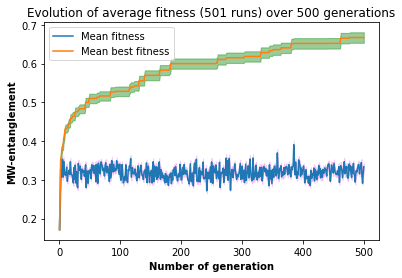

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# read the data from file
data = np.loadtxt('Mutation_0.10_10gates.txt', delimiter=',')

# extract the mean fitness, standard deviation, mean best fitness, and standard deviation of best fitness from the data
mean_fitness = data[:, 0]
std_fitness = data[:, 1]
mean_best_fitness = data[:, 3]
std_best_fitness = data[:, 4]

# calculate the standard error of the mean fitness and mean best fitness
number_of_runs = len(data)
standard_error = std_fitness / np.sqrt(number_of_runs)
standard_error_best = std_best_fitness / np.sqrt(number_of_runs)

# plot the mean fitness and mean best fitness with standard errors
plt.plot(mean_fitness, label='Mean fitness')
plt.plot(mean_best_fitness, label='Mean best fitness')
plt.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.4, color='violet')
plt.fill_between(range(len(mean_best_fitness)), mean_best_fitness - standard_error_best, mean_best_fitness + standard_error_best, alpha=0.4, color='green')

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))
plt.legend()
#plt.savefig("plot_3gates_1Pmutation_Without_best_fit.pdf")
plt.show()


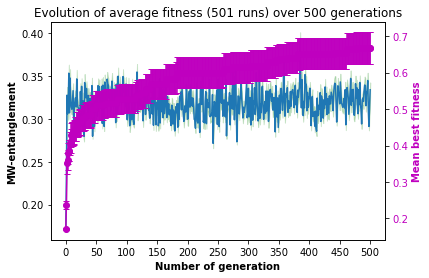

In [7]:
# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness)
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))

# plot the mean best fitness with standard error on the right y-axis
ax2.errorbar(np.arange(len(mean_best_fitness)), mean_best_fitness, yerr=standard_error_best_fitness, fmt='o-',capsize=3,color='m')#, yerr=standard_error_best_fitness, fmt='o-', capsize=3, color='r')
ax2.set_ylabel('Mean best fitness', color='m',fontweight='bold')
ax2.tick_params(axis='y', labelcolor='m')

# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# show the plot
#plt.savefig("plot_3gates_10Pmutation_with_error.pdf")
plt.show()


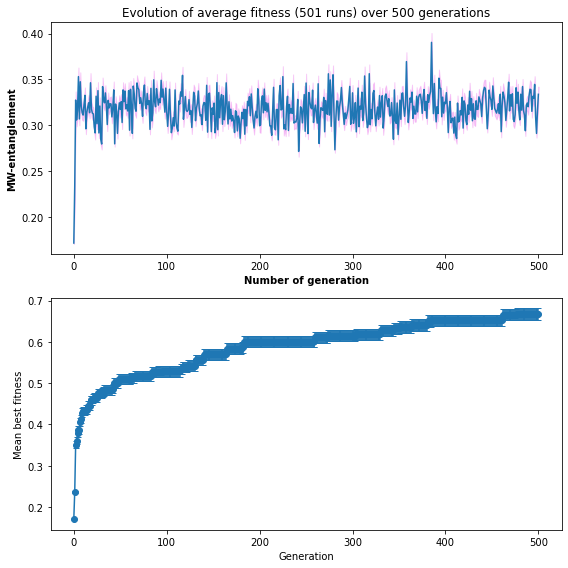

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
# extract the mean fitness, standard deviation, mean best fitness, and standard deviation of best fitness from the data
mean_fitness = data[:, 0]
std_fitness = data[:, 1]
mean_best_fitness = data[:, 3]
std_best_fitness = data[:, 4]

# calculate the standard error of the mean fitness and mean best fitness
number_of_runs = len(data)
standard_error = std_fitness / np.sqrt(number_of_runs)
standard_error_best_fitness = std_best_fitness / np.sqrt(number_of_runs)
# plot the mean fitness with standard error
ax1.plot(mean_fitness)
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.4, color='violet')
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of average fitness ({} runs) over 500 generations".format(number_of_runs))

# plot the mean best fitness with standard error
ax2.errorbar(np.arange(len(mean_best_fitness)), mean_best_fitness, yerr=standard_error_best_fitness, fmt='o-', capsize=3)
ax2.set_xlabel('Generation')
ax2.set_ylabel('Mean best fitness')

plt.tight_layout()
plt.show()


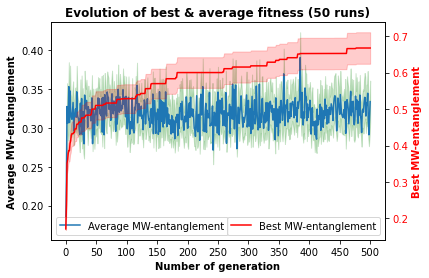

In [9]:
# read the data from file
data = np.loadtxt('Mutation_0.10_10gates.txt', delimiter=',')
# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# extract the mean fitness, standard deviation, mean best fitness, and standard deviation of best fitness from the data
mean_fitness = data[:, 0]
std_fitness = data[:, 1]
mean_best_fitness = data[:, 3]
std_best_fitness = data[:, 4]

# calculate the standard error of the mean fitness and mean best fitness
number_of_runs = len(data)
standard_error = std_fitness / np.sqrt(50)
standard_error_best_fitness = std_best_fitness / np.sqrt(50)

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness, label='Average MW-entanglement')
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')

# plot the shadow plot for mean best fitness with standard error on the right y-axis
ax2.fill_between(np.arange(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness, mean_best_fitness + standard_error_best_fitness, alpha=0.2, color='r')
ax2.plot(mean_best_fitness, label='Best MW-entanglement', color='r')

# set the labels and title
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("Average MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of best & average fitness (50 runs)".format(number_of_runs),fontweight='bold')
ax2.set_ylabel('Best MW-entanglement', color='r', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='r')
# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# add legend
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# show the plot
#plt.savefig("bestplot_3gates_0.15Pmutation_with_error.pdf")
plt.show()


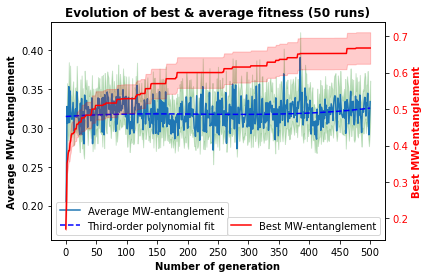

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# read the data from file
data = np.loadtxt('Mutation_0.10_10gates.txt', delimiter=',')

# create a figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# extract the mean fitness, standard deviation, mean best fitness, and standard deviation of best fitness from the data
mean_fitness = data[:, 0]
std_fitness = data[:, 1]
mean_best_fitness = data[:, 3]
std_best_fitness = data[:, 4]

# calculate the standard error of the mean fitness and mean best fitness
number_of_runs = len(data)
standard_error = std_fitness / np.sqrt(50)
standard_error_best_fitness = std_best_fitness / np.sqrt(50)

# plot the mean fitness with standard error on the left y-axis
ax1.plot(mean_fitness, label='Average MW-entanglement')
ax1.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.2, color='green')

# fit a third-order polynomial to the mean fitness data and plot the resulting curve
p_fit = np.polyfit(np.arange(len(mean_fitness)), mean_fitness, 3)
x_fit = np.linspace(0, len(mean_fitness)-1, 100)
y_fit = np.polyval(p_fit, x_fit)
ax1.plot(x_fit, y_fit, color='blue', linestyle='--', label='Third-order polynomial fit')

# plot the shadow plot for mean best fitness with standard error on the right y-axis
ax2.fill_between(np.arange(len(mean_best_fitness)), mean_best_fitness - standard_error_best_fitness, mean_best_fitness + standard_error_best_fitness, alpha=0.2, color='r')
ax2.plot(mean_best_fitness, label='Best MW-entanglement', color='r')

# set the labels and title
ax1.set_xlabel("Number of generation", fontweight='bold')
ax1.set_ylabel("Average MW-entanglement", fontweight='bold')
ax1.set_title("Evolution of best & average fitness (50 runs)".format(number_of_runs),fontweight='bold')
ax2.set_ylabel('Best MW-entanglement', color='r', fontweight='bold')
ax2.tick_params(axis='y', labelcolor='r')

# set the x-ticks to show index values
ax1.set_xticks(np.arange(0, len(mean_fitness), 50))
ax1.set_xticklabels(np.arange(0, len(mean_fitness), 50))

# add legend
ax1.legend(loc='lower left')
ax2.legend(loc='lower right')

# show the plot
plt.savefig("bestplot_10gates_0.10Pmutation_with_error_and_polyfit.pdf")
plt.show()
